# Question 1 (60%, recognizing digit in an image using Logistic Regression model)

In this question, we are going to train a logistic regression model to recognize the digit in an image. The images used are mnist hand-written digit. The image is with size 28 by 28. Each image is vectorized (concatenate columns in the image sequentially) as a vector with length 784. The set of labels is {0,1,2,3,4,5,6,7,8,9}. We only pick two labels for this question so that the classification problem is a binary classification which logistic regression is able to deal with.

There are 60,000 training samples and 10,000 testing samples.

The following python commands may help you in solving the problem:

reshape, np.tile, np.vstack, np.hstack, np.concatenate, np.clip

> 1. Please note that for-loop and while-loop are not encouraged to use due to the low efficiency. Code with for-loop or while-loop would lose marks.
>
> 2. Only write the code in the required blocks shown below
>        ### write your code below ###
>        
>        ### write your code above ###
Code written outside the block may lose marks.
>
> 3. Other parts of the code, including method name, input arguments, return values are prohibited to change.
> 4. Please note that for-loop and while-loop are not encouraged to use due to the low efficiency. Code with for-loop or while-loop would lose marks.
> 5. When exponential function is computed, such as in computing value of sigmoid function, tricks must be implemented to avoid stack overflow.
> 6. Variable name should be concise, representing the variable, neither too long nor too short. Messy variable names may lose marks.
> 7. Necessary comments are required. Otherwise it is impossible for others to read the code. Code that are hard to read and missing comments may lose marks.
> 8. In course slides, sample input is a column vector, while in the code implementation sample input is a row vector. The purpose is to make the use of training input matrix conveniently. Thus, you need to change formulas in the course slides a bit following which to write the code.


w x为列向量

![](https://ai-studio-static-online.cdn.bcebos.com/d145445d0fef43efa73aacf04430411e22c9fc202f8e491f9d19bd06299e2d81)


##  scikit-learn官方文档：
https://scikit-learn.org/stable/

In [ ]:
import numpy as np
import struct
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.utils import gen_batches #划分batch
np.random.seed(2022)

train_image_file = '/home/aistudio/data/data136845/train-images-idx3-ubyte'
train_label_file = '/home/aistudio/data/data136845/train-labels-idx1-ubyte'
test_image_file = '/home/aistudio/data/data136845/t10k-images-idx3-ubyte'
test_label_file = '/home/aistudio/data/data136845/t10k-labels-idx1-ubyte'


def decode_image(path: str) -> np.ndarray:
    with open(path, 'rb') as f:
        magic, num, rows, cols = struct.unpack('>IIII', f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(-1, 784)
        images = np.array(images, dtype = float)
    return images

def decode_label(path: str) -> np.ndarray:
    with open(path, 'rb') as f:
        magic, n = struct.unpack('>II',f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
        labels = np.array(labels, dtype = float)
    return labels

def load_data() -> tuple:
    train_X = decode_image(train_image_file)
    train_Y = decode_label(train_label_file)
    test_X = decode_image(test_image_file)
    test_Y = decode_label(test_label_file)
    return (train_X, train_Y, test_X, test_Y)

idxa 11518
idxa 6272
idxa 12124


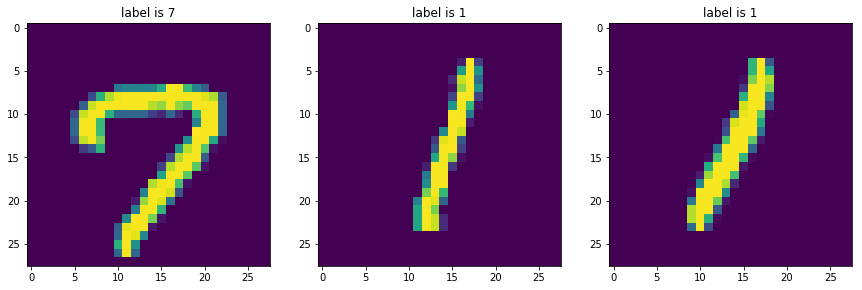

number of features is 784
number of training samples is 13007
number of testing samples is 2163


In [377]:
trainX, trainY, testX, testY = load_data()
#分类出 1或者7
# digit1 and digit2 are two digits used for binary classification. You could change their values.
digit1 = 1
digit2 = 7

idx = (trainY == digit1)+(trainY==digit2)
trainX, trainY = trainX[idx, :], trainY[idx]
num_train, num_feature = trainX.shape#训练集图片数量 图片尺寸：特征
idx = (testY == digit1)+(testY==digit2)
testX, testY = testX[idx, :], testY[idx]
num_test = testX.shape[0]

plt.figure(1, figsize=(20,5))
for i in range(1,4):
    # print("idxb",idx)
    idx = np.random.choice(range(num_train))
    print("idxa",idx)
    plt.subplot(int('14'+str(i+1)))
    plt.imshow(trainX[idx,:].reshape((28,28)))# 图片格式numpy.ndarray
    plt.title('label is %d'%trainY[idx])
plt.show()

print('number of features is %d'%num_feature)
print('number of training samples is %d'%num_train)
print('number of testing samples is %d'%num_test)
trainY[np.where(trainY == digit1)], trainY[ np.where(trainY ==digit2)] = 0,1
testY[np.where(testY == digit1)], testY[np.where(testY == digit2)] = 0,1

0.0

In [373]:
class LogisticRegression():
    def __init__(self, num_feature: int, learning_rate: float) -> None:
        '''
        Constructor
        Parameters:
          num_features is the number of features.
          learning_rate is the learning rate.
        Return:
          there is no return value.
        '''
        self.num_feature = num_feature #图片尺寸：特征
        self.w = np.random.randn(num_feature + 1)#num_feature + 1行
        self.learning_rate = learning_rate

    def artificial_feature(self, x: np.ndarray)->np.ndarray:
        '''
        add one artificial features to the data input
        Parameters:
          x is the data input. x is one dimensional or two dimensional numpy array.
        Return:
          updated data input with the last column of x being 1s.
        '''
        if len(x.shape) == 1: # if x is one dimensional, convert it to be two dimensional
            x = x.reshape((1, -1))
        #### write your code below ####
        n = x.shape[0]
        oo=np.ones((n,1))
        X=np.hstack((x,oo))
  
        #### write yoru codel
        return X

    def sigmoid(self, x: np.ndarray)-> np.ndarray:
        '''
        Compute sigmoid activation function value by f(x*w)
        Parameters:
          x is data input with artificial features. x is a two dimensional numpy array.
        Return:
          one dimensional numpy array
        '''
        ### write your code below ###
        # first compute inner product between x and self.w
        # sencond, compute logistic function value of x*self.w
        prob = .5 * (1 + np.tanh(.5 * x))#解决浮点数溢出，与sigmoid标准写法一致
        # prob=1 / (1 + np.exp(-x))  #sigmoid function
        # prob = np.exp(x-b) /(np.exp(x-b)+np.exp(-b))
        ### write your code above ###
        return prob

    def predict(self, X: np.ndarray)->np.ndarray:
        '''
        Predict label probability for the input X
        Parameters:
          X is the data input. X is one dimensional or two dimensional numpy array.
        Return: 
          predicted label probability, which is a one dimensional numpy array.
        '''
        X = self.artificial_feature(X)
        #### write your code below ####
        prob=self.w.dot(X.T)
        prob = (prob>0.5).astype(np.float64)
        #### write your code above ####
        return prob # 0 1

    def loss(self, y: np.ndarray, prob: np.ndarray)->float:
        '''
        Compute cross entropy loss.
        Parameters:
          y is the true label. y is a one dimensional array.
          prob is the predicted label probability. prob is a one dimensional array.
        Return:
          cross entropy loss
        '''
        #### write your code below ####
        #### you must think of how to deal with the case that prob contains 1 or 0 ####
        # loss_value=-np.sum(y*np.log(prob)+(1-y)*np.log(1-prob))

        # 如果输入数据是一维的，即单个数据，则需要确保把y,t变为行向量而非列向量
        # 确保后面计算batch_size为1
        if y.ndim == 1:
          prob = prob.reshape(1, prob.size) # t是one-hot标签
          y = y.reshape(1, y.size)

          batch_size = y.shape[0] # y的行数
        loss_value= -np.sum(y*np.log(prob+1e-7)+(1-y)*np.log(1-prob+1e-7)) / y.shape[0]
        #return -np.sum(Y * np.log(P) + (1 - Y) * np.log(1 - P))
        #### write your code above ####
        return loss_value

    def gradient(self, trainX: np.ndarray, trainY: np.ndarray)->np.ndarray:
        '''
        Compute gradient of logistic regression.
        Parameters:
          trainX is the training data input. trainX is a two two dimensional numpy array.
          trainY is the training data label. trainY is a one dimensional numpy array.
        Return:
          a one dimensional numpy array representing the gradient
        '''
        x = self.artificial_feature(trainX)#变换格式 (x,1)
        # print(x.shape)
        # print(self.w.shape)
        #### write your code below ####
        g=trainX.shape[0]*(-trainY+self.sigmoid(self.w.dot(x.T))).dot(x)
        #### write your code above ####
        return g
    
    def update_weight(self, dLdw: np.ndarray)-> None:
        '''
        Update parameters of logistic regression using the given gradient.
        Parameters:
          dLdw is a one dimensional gradient.
        Return:
          there is no return value
        '''
        self.w += -self.learning_rate*dLdw
        return
    
    def one_epoch(self, X: np.ndarray,  Y: np.ndarray, batch_size: int, train : bool = True)->tuple:
        '''
        One epoch of either training or testing procedure.
        Parameters:
          X is the data input. X is a two dimensional numpy array.
          Y is the data label. Y is a one dimensional numpy array.
          batch_size is the number of samples in each batch.
          train is a boolean value indicating training or testing procedure.
        Returns:
          loss_value is the average loss function value.
          acc is the prediction accuracy.        
        '''
        num_sample = X.shape[0] # number of samples :图片数量
        num_correct = 0        # number of corrected predicted samples
        num_batch = int(num_sample/batch_size)+1 # number of batch
        #以num_batch：50为长度划分 num_sample：13007 
        batch_index = list(gen_batches(num_sample, num_batch)) # index for each batch： slice(51, 102, None)
        
        # print("batch_index：",batch_index,'\n')
        loss_value = 0 # loss function value
        for i, index in enumerate(batch_index): # the ith batch
            # print("i:",i, "index:",index) i:0~261 index:slice(i*51, (i+1)*51, None)
            x, y = X[index,:], Y[index] # get a batch of samples 
            if train:
                dLdw = self.gradient(x, y) # compute gradient 计算该批量的梯度
                self.update_weight(dLdw)   # update parameters of the model 根据梯度更新权重
            prob = self.predict(x)        # predict the label probability 预测
            loss_value += self.loss(y, prob)*x.shape[0]  # loss function value for ith batch 计算loss
            # print(loss_value)
            num_correct += self.accuracy(y, prob)*x.shape[0]  #计算准确率
        loss_value = loss_value/num_sample # average loss
        acc = num_correct/num_sample       # accuracy
        return loss_value, acc
    
    def accuracy(self, y: np.ndarray, prob: np.ndarray)-> float:
        '''
        compute accuracy
        Parameters:
          y is the true label. y is a one dimensional array.
          prob is the predicted label probability. prob is a one dimensional array.
        Return:
          acc is the accuracy value
        '''
        #### write your code below ####
        
        acc=np.sum((y==prob).astype(np.int))/y.shape[0]#统计
        
        
        #### write your code above ####
        return  acc
    

In [ ]:
def train(model, trainX, trainY, epoches, batch_size):
    loss_value, acc = model.one_epoch(trainX, trainY, batch_size, train = False)
    print('Initialization: ', 'loss %.4f  '%loss_value, 'accuracy %.2f'%acc)
    for epoch in range(epoches):
        loss_value, acc = model.one_epoch(trainX, trainY, batch_size)
        print('epoch: %d'%(epoch+1), 'loss %.4f  '%loss_value, 'accuracy %.2f'%acc)

In [374]:
model = LogisticRegression(num_feature, learning_rate = 0.01)
train(model, trainX, trainY, epoches = 5, batch_size = 256)#训练：传入训练数据与标签，轮数：5轮 每batch图片数256

Initialization:  loss 437.2754   accuracy 0.47
epoch: 1 loss 4.6767   accuracy 0.99
epoch: 2 loss 1.5800   accuracy 1.00
epoch: 3 loss 1.5168   accuracy 1.00
epoch: 4 loss 1.2008   accuracy 1.00
epoch: 5 loss 1.5800   accuracy 1.00


In [375]:
test_loss, test_acc = model.one_epoch(testX, testY, batch_size = 256, train = False)#测试
print('testing accuracy is %.4f'%test_acc)

testing accuracy is 0.9912


### 预测结果可视化

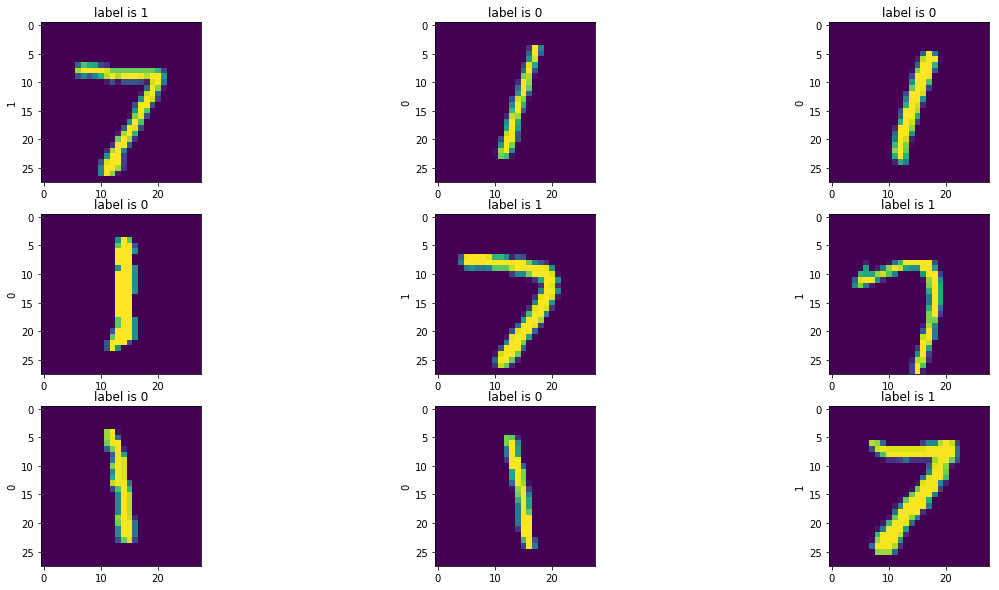

In [380]:


#分类出 1或者7
# digit1 and digit2 are two digits used for binary classification. You could change their values.
aa=model.predict(testX)#预测
plt.figure(1, figsize=(20,10))
for i in range(9):
    # print("idxb",idx)
    idx = i #np.random.choice(range(num_train))
    plt.subplot(int('33'+str(i+1)))
    plt.imshow(testX[idx,:].reshape((28,28)))# 图片格式numpy.ndarray
    plt.title('label is %d'%testY[idx])
    plt.ylabel(int(aa[i]))
    # if aa[i] ==0:
    #     plt.ylabel(1)
    # else:
    #     plt.ylabel(7)
plt.show()


# Question 2 (40%,  recognizing the digit in an image using Multinomial Logistic Regression model)

In this questin, we are going to implement multinomial regression to recognize digit in mnist hand-written images. The number of classes is now ten. 

> 1. Please note that in course slides, sample input is a column vector, while in the code implementation sample input is a row vector. The purpose is to make the use of training input matrix conveniently. Thus, you need to change formulas in the course slides a bit following which to write the code.
> 2. Labels are in the form of **one-hot vectors**.

交叉熵损失函数：-y*log(y_hat)

y=[0,0,0,...,1]

y_hat=[0,0,0...,1]

![](https://ai-studio-static-online.cdn.bcebos.com/0639ec1ccd0d4ff4841e50c93ef06a696a44b8935c1e4940b1779854ea135283)


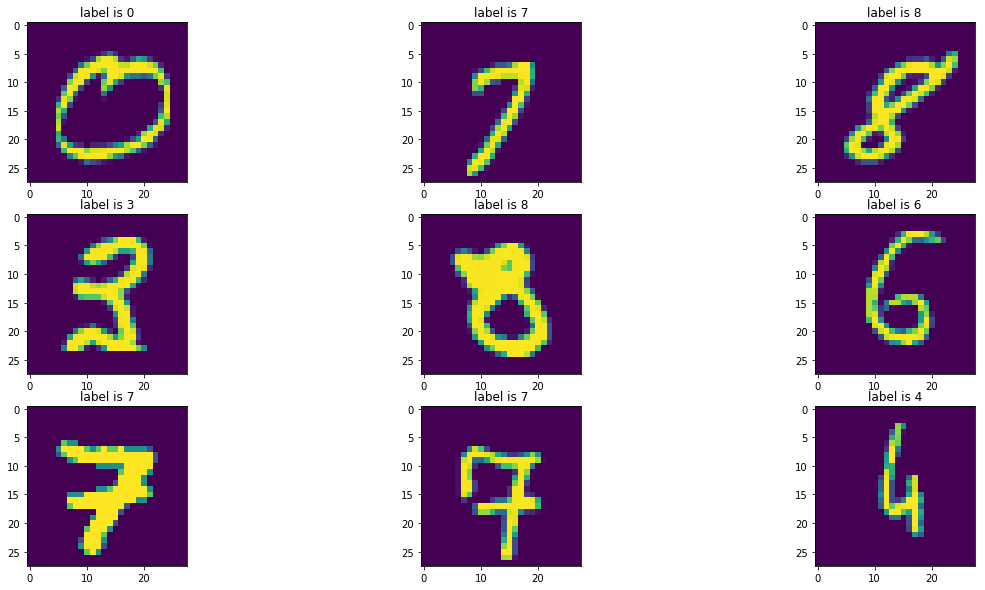

In [ ]:
trainX, trainY, testX, testY = load_data()

num_train, num_feature = trainX.shape
plt.figure(1, figsize=(20,10))
for i in range(9):
    idx = np.random.choice(range(num_train))
    plt.subplot(int('33'+str(i+1)))
    plt.imshow(trainX[idx,:].reshape((28,28)))
    plt.title('label is %d'%trainY[idx])
plt.show()

In [ ]:
def to_onehot(y: np.ndarray)-> np.ndarray:
    '''
    Covert ordinal labels to one-hot vector labels.
    Parameters:
      y is a one dimensional numpy array containing oridinal class labels.
    Returns:
      a two dimensional numpy array with each row a one-hot vector.    
    '''
    y = y.astype(int)
    num_class = len(set(y))
    Y = np.eye((num_class))
    return Y[y]

trainY = to_onehot(trainY) # convert traing sample labels to one-hot vectors
testY = to_onehot(testY)  # convert testing sample labels to one-hot vectors
num_train, num_feature = trainX.shape
num_test, _ = testX.shape
_, num_class = trainY.shape
print('number of features is %d'%num_feature)
print('number of classes is %d'%num_class)
print('number of training samples is %d'%num_train)
print('number of testing samples is %d'%num_test)

number of features is 784
number of classes is 10
number of training samples is 60000
number of testing samples is 10000


In [ ]:
class MNRegression():
    def __init__(self, num_feature: int, num_class: int, learning_rate: float) -> np.ndarray:
        self.num_feature = num_feature
        self.num_class = num_class #类别数:10: 0-9
        self.W = np.random.randn(num_feature + 1, num_class) #(num_feature + 1,10)
        self.learning_rate = learning_rate

    def artificial_feature(self, x: np.ndarray) -> np.ndarray:
        '''
        add one artificial features to the data input
        Parameters:
          x is the data input. x is one dimensional or two dimensional numpy array.
        Return:
          updated data input with the last column of x being 1s.
        '''
        if len(x.shape) == 1: # if x is one dimensional, convert it to be two dimensional
            x = x.reshape((1, -1))
        #### write your code below ####
        n = x.shape[0]
        oo = np.ones((n,1))
        X = np.hstack((x,oo))
        
        #### write your code above ####
        return X
        
    def softmax(self, x:np.ndarray)->np.ndarray:
        '''
        softmax function
        Parameters:
          x is a two dimensional numpy array representing data input
        Returns:
          value of softmax function. which is a two dimensional numpy array.
        '''
        num_sample = x.shape[0]
        num_class = self.W.shape[1] #类别数
        #### write your code below ####
        # first compute x*self.W
        # print("x.shape:",x.shape,"self.W.shape:",self.W.shape)
        # second, compute softmax(x*self.W)
        z = x.dot(self.W)
        b=np.max(z) #   除数归一化 解决浮点数溢出
        # print("b:",b)
        # print("z:",z)
        # print("z-b:",z-b)
        prob = np.exp(z/b) /np.sum(np.exp(z/b))
        # print("prob1:",prob,"prob1.shape:",prob.shape)
        # print("np.exp(z):",np.exp(z/b),"np.sum(np.exp(z)):",np.sum(np.exp(z/b)))
        #### write your code above ####
        return prob

    def predict(self, X: np.ndarray)-> np.ndarray:
        '''
        Predict label probability for the input X
        Parameters:
          X is the data input. X is one dimensional or two dimensional numpy array.
        Return: 
          predicted label probability, which is a two dimensional numpy array.
        '''
        x = self.artificial_feature(X)
        #### write your code below ####
        y_hat=self.softmax(x)
        # print(y_hat)
        # prob=np.argmax(y_hat)
        # prob1=y_hat.argmax(axis=1)
        """
        将二维数组每一行最大值变为1，其余为0
        """
        indices = np.argmax(y_hat, axis=1)#求每行最大值
        indices = np.expand_dims(indices, axis=1)#按行
        output = np.zeros_like(y_hat)
        np.put_along_axis(output, indices, 1, axis=1)
        # prob1=(y_hat>=y_hat[prob]).astype(np.int)
        # print(output)
        #### write your code above ####
        return output

    def loss(self, y: np.ndarray, prob: np.ndarray)->float:
        '''
        Compute the cross entropy loss
        Parameters:
          y is the true label, which is a two dimensional array.
          prob is the predicted label probability, which is a two dimensional array.
        Return:
          cross entropy loss, which is a scalar.
        
        NOTE that for each sample input the predicted label proability is a one dimensional array other than a number.
        '''
        #### write your code below ####
        if y.ndim == 1:
          prob = prob.reshape(1, prob.size) # t是one-hot标签
          y = y.reshape(1, y.size)
        # print("y.shape:",y.shape,"prob.shape:",prob.shape)
        #y.shape: (234, 10) prob.shape: (234, 10)
        value= -np.sum(y*np.log(prob+1e-7)) / y.shape[0]#交叉熵
        
        #### write your code above ####
        return value

    def gradient(self, trainX: np.ndarray, trainY: np.ndarray) -> np.ndarray:
        '''
        Compute gradient of logistic regression.
        Parameters:
          trainX is the training data input. trainX is a two two dimensional numpy array.
          trainY is the training data label. trainY is a two dimensional numpy array.
        Return:
          a one dimensional numpy array representing the gradient
        '''
        x = self.artificial_feature(trainX)
        # print("trainX.shape:",trainX.shape,"trainY.shape:",trainY.shape)
        #### write your code below ####
        y_hat=self.predict(trainX)
        """
        trainX.shape: (20, 784) trainY.shape: (20, 10)
        y_hat.shape (20, 10) x.shape: (20, 785)
        """

        # print("y_hat.shape",y_hat.shape,"x.shape:",x.shape)
        g=(y_hat-trainY).T.dot(x)           
        # print("g.shape:",g.shape)
        #### write your code above ####
        return g.T

    def update_weight(self, dLdw: np.ndarray) -> None:
        #W.shape:(785,10)  dLdw.shape:
        self.W += -self.learning_rate*dLdw
        
    def one_epoch(self, trainX: np.ndarray, trainY: np.ndarray, batch_size: int, train: bool = True)-> tuple:
        num_sample =trainX.shape[0] #样本数量 60000
        num_batch = int(num_sample/batch_size)
        batch_index = list(gen_batches(num_sample, num_batch))
        loss_value = 0
        num_correct = 0  
        for i, index in enumerate(batch_index):
            # print("i:",i, "index:",index) i:0~num_batch index:slice(i*num_batch, (i+1)*num_batch, None)
            X = trainX[index,:]
            y = trainY[index]
            # print(y.shape)
            if train:
                dLdW = self.gradient(X, y)#batch梯度下降
                self.update_weight(dLdW)#更新权重
            prob = self.predict(X)#预测：返回[0,0,...,1]格式
            loss_value += self.loss(y, prob)*X.shape[0]
            num_correct += self.accuracy(y, prob)*X.shape[0]
        loss_value = loss_value/num_sample
        acc = num_correct/num_sample
        return loss_value, acc

    def accuracy(self, y: np.ndarray, prob: np.ndarray)-> float:
        '''
        compute accuracy
        Parameters:
          y is the true label. y is a two dimensional array.
          prob is the predicted label probability. prob is a two dimensional array.
        Return:
          acc is the accuracy value
        '''
        #### write your code below ####
        acc = np.mean((y == prob ).astype('int16')) 
        # print(y,prob)
        #### write your code above ####
        return  acc

In [ ]:
def train(model, trainX, trainY, epoches, batch_size):
    loss_value, acc = model.one_epoch(trainX, trainY, batch_size, train = False)
    print('Initialization: ', 'loss %.4f  '%loss_value, 'accuracy %.2f'%acc)
    for epoch in range(epoches):
        loss_value, acc_train = model.one_epoch(trainX, trainY, batch_size)
        print('epoch: %d'%(epoch+1), 'loss %.4f  '%loss_value, 'accuracy %.2f'%acc_train)

In [ ]:
model = MNRegression(num_feature, num_class, learning_rate = 0.01)
train(model, trainX, trainY, epoches = 30, batch_size = 256)

Initialization:  loss 14.3333   accuracy 0.82
epoch: 1 loss 2.5660   accuracy 0.97
epoch: 2 loss 1.8931   accuracy 0.98
epoch: 3 loss 1.7792   accuracy 0.98
epoch: 4 loss 1.7953   accuracy 0.98
epoch: 5 loss 1.6739   accuracy 0.98
epoch: 6 loss 1.6650   accuracy 0.98
epoch: 7 loss 1.5898   accuracy 0.98
epoch: 8 loss 1.6876   accuracy 0.98
epoch: 9 loss 1.6792   accuracy 0.98
epoch: 10 loss 1.6148   accuracy 0.98
epoch: 11 loss 1.6287   accuracy 0.98
epoch: 12 loss 1.5901   accuracy 0.98
epoch: 13 loss 1.5903   accuracy 0.98
epoch: 14 loss 1.6016   accuracy 0.98
epoch: 15 loss 1.5661   accuracy 0.98
epoch: 16 loss 1.5436   accuracy 0.98
epoch: 17 loss 1.5901   accuracy 0.98
epoch: 18 loss 1.5731   accuracy 0.98
epoch: 19 loss 1.5003   accuracy 0.98
epoch: 20 loss 1.5205   accuracy 0.98
epoch: 21 loss 1.5806   accuracy 0.98
epoch: 22 loss 1.5688   accuracy 0.98
epoch: 23 loss 1.4901   accuracy 0.98
epoch: 24 loss 1.5393   accuracy 0.98
epoch: 25 loss 1.5046   accuracy 0.98
epoch: 26 los

In [ ]:
test_loss, test_acc = model.one_epoch(testX, testY, batch_size = 256, train = False)
print('testing accuracy is %.4f'%test_acc)

testing accuracy is 0.9806


### 可视化预测结果 y_label为预测结果，title为标签

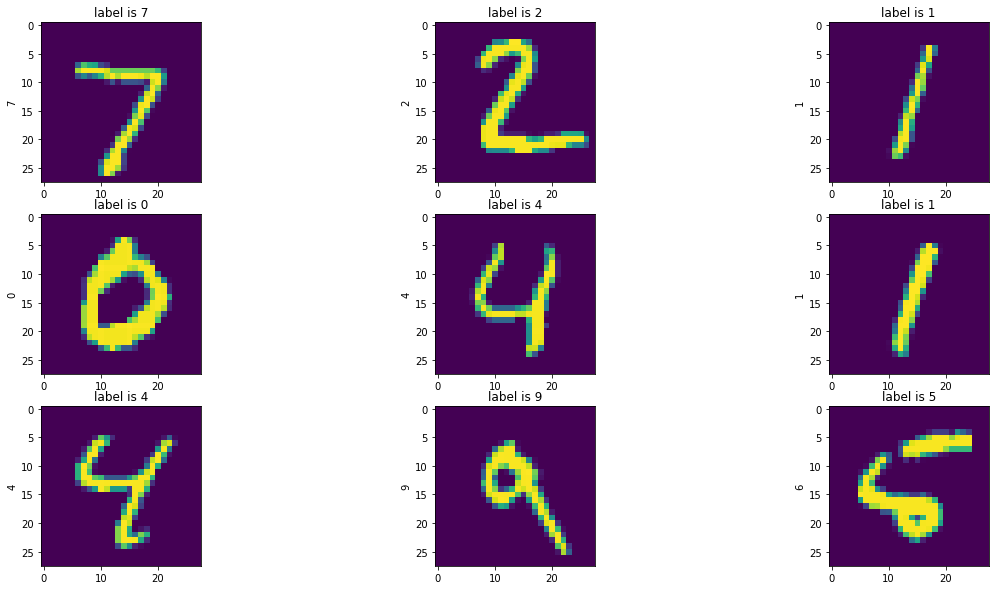

In [ ]:
trainX, trainY, testX, testY = load_data()
aa=model.predict(testX)
num_train, num_feature = testX.shape
plt.figure(1, figsize=(20,10))
for i in range(9):
    # idx = np.random.choice(range(num_train))
    idx =i
    plt.subplot(int('33'+str(i+1)))
    plt.imshow(testX[idx,:].reshape((28,28)))
    plt.title('label is %d'%testY[idx])
    # plt.ylabel('label is %d'%testY[idx])
    plt.ylabel(aa.argmax(axis=1)[i])

plt.show()

## 总结：防止浮点数溢出
单类别：def logistic_function1(x):
    return  .5 * (1 + np.tanh(.5 * x))


多类别：可以先归一化


请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 